In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## Original

In [37]:
covariance = np.load('covariance_mat.npy')

In [38]:
eigenval, eigenvec = np.linalg.eig(covariance)

In [18]:
eigenval[:10]

array([ 1302.0497201 ,   809.89153733,   140.80558188,   108.54521796,
         105.08998102,    95.08845292,    91.49587644,    84.49220586,
          83.6425031 ,    78.3039938 ])

In [6]:
eigenval.shape

(2188,)

In [7]:
eigenvec.shape

(2188, 2188)

In [33]:
eigenval_tot = np.sum(eigenval)
print eigenval_tot

27758.9298738


In [34]:
def get_rec_error(numPCs):
    reconstruction_error = eigenval_tot
    for i in range(numPCs):
        reconstruction_error -= eigenval[i]
    return reconstruction_error

In [35]:
get_rec_error(10)

24859.524803341381

In [36]:
get_rec_error(20)

24180.568014096774

In [42]:
rec_errors = []
for i in range(1,len(eigenval)):
    rec_errors.append(get_rec_error(i))

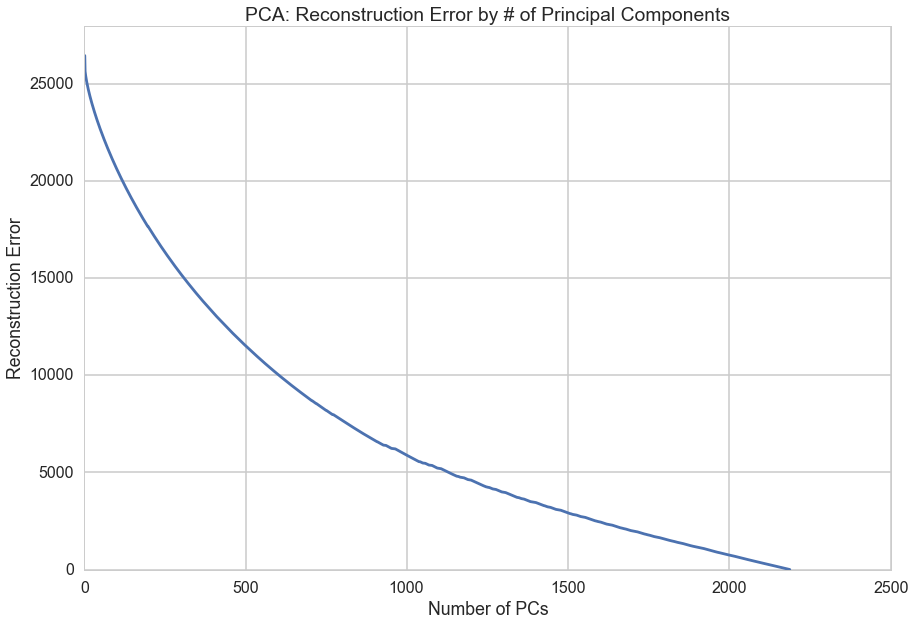

In [45]:
plt.plot(range(1,len(eigenval)),rec_errors)
plt.title('PCA: Reconstruction Error by # of Principal Components')
plt.xlabel('Number of PCs')
plt.ylabel('Reconstruction Error')
plt.ylim((0,28000))
plt.tight_layout()
plt.show()

## New matrix

In [43]:
covariance = np.load('covariance_mat_collapsed.npy')

In [44]:
eigenval, eigenvec = np.linalg.eig(covariance)

In [6]:
eigenval_tot = np.sum(eigenval)
print eigenval_tot

58942.3460822


In [7]:
def get_rec_error(numPCs):
    reconstruction_error = eigenval_tot
    for i in range(numPCs):
        reconstruction_error -= eigenval[i]
    return reconstruction_error

In [8]:
rec_errors = []
for i in range(1,len(eigenval)):
    rec_errors.append(get_rec_error(i))

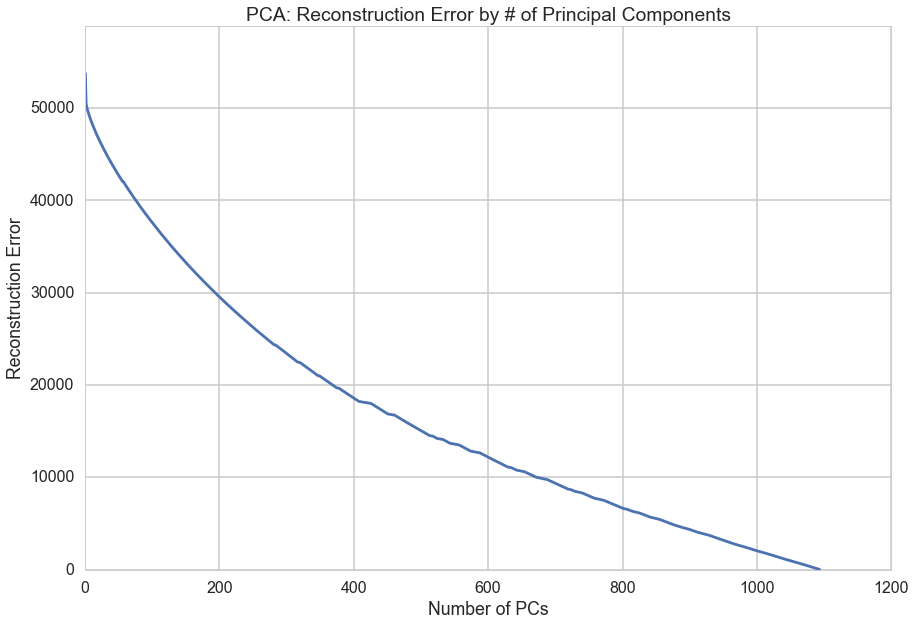

In [10]:
plt.plot(range(1,len(eigenval)),rec_errors)
plt.title('PCA: Reconstruction Error by # of Principal Components')
plt.xlabel('Number of PCs')
plt.ylabel('Reconstruction Error')
plt.ylim((0,eigenval_tot))
plt.tight_layout()
plt.show()

In [11]:
eigenval

array([ 5177.23081907,  3205.59055339,   465.90127073, ...,    22.32961589,
          22.26620692,    21.05160964])

In [13]:
(eigenval[0]+eigenval[1]+eigenval[2])/eigenval_tot

0.15012504983847108

In [23]:
cum_eigenvals = [eigenval[0]/eigenval_tot]
sum_eigenvals = eigenval[0]
for i in range(1,len(eigenval)):
    sum_eigenvals += eigenval[i]
    cum_eigenvals.append(sum_eigenvals/eigenval_tot)

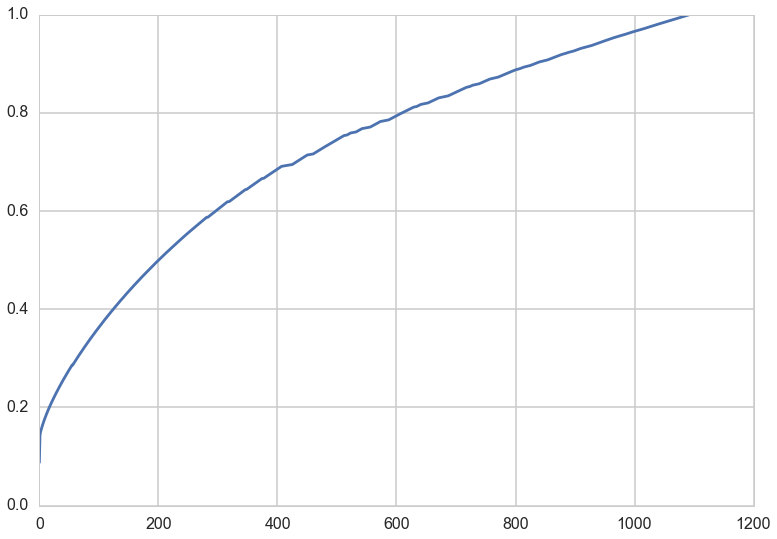

In [25]:
plt.plot(range(len(eigenval)), cum_eigenvals)

# package pca?

In [3]:
from sklearn.decomposition import PCA

In [4]:
data = np.load('condensed_impute.npy.npz')

In [5]:
data = data['arr_0']

In [6]:
data.shape

(824876, 1094)

In [ ]:
%%time
pca = PCA(n_components=2)
pca.fit(data)

In [ ]:
print(pca.explained_variance_ratio_)

# try clustering on pca?

In [3]:
from scipy.sparse import csr_matrix

In [4]:
data = np.load('condensed_impute.npy.npz')

In [5]:
data = data['arr_0']

In [23]:
data = csr_matrix(data)

In [14]:
#%%time
#data = data - data.mean(1)

CPU times: user 8.45 s, sys: 18.2 s, total: 26.7 s
Wall time: 48.8 s


In [24]:
eigenval.shape

(1094,)

In [25]:
eigenvec.shape

(1094, 1094)

In [28]:
eigenvec[:,0:2].shape

(1094, 2)

In [27]:
data.shape

(824876, 1094)

In [29]:
%%time
data = data.dot(eigenvec[:,0:2])

CPU times: user 627 ms, sys: 896 ms, total: 1.52 s
Wall time: 1.61 s


In [30]:
data.shape

(824876, 2)

In [31]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

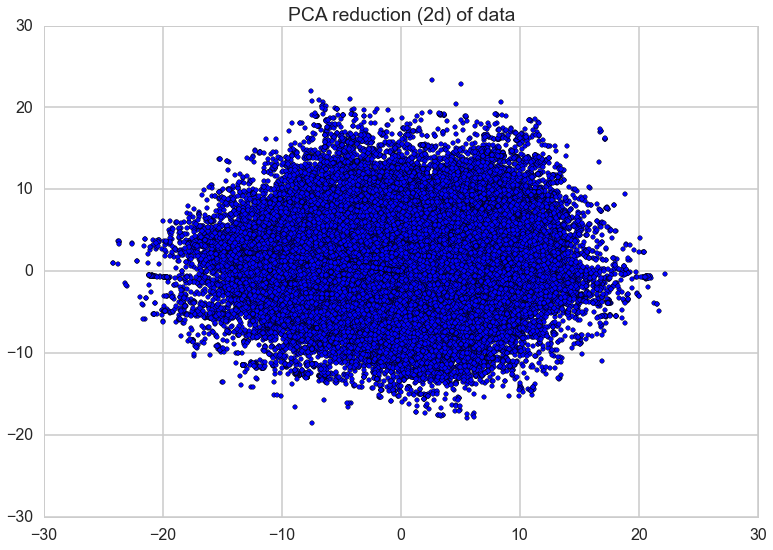

In [33]:
plt.scatter(data[:, 0], data[:, 1])
plt.title("PCA reduction (2d) of data")
#plt.xticks(())
#plt.yticks(())
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [35]:
%%time
K = 3
KM = KMeans(n_clusters=K, init='k-means++')
KM.fit(data)

CPU times: user 7.74 s, sys: 1.8 s, total: 9.54 s
Wall time: 8.77 s


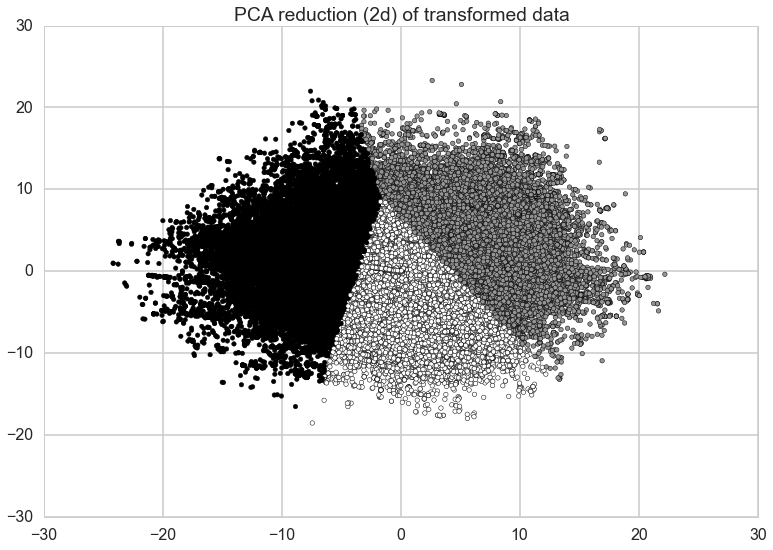

In [36]:
plt.scatter(data[:, 0], data[:, 1], c=KM.labels_)
plt.title("PCA reduction (2d) of transformed data")
#plt.xticks(())
#plt.yticks(())
plt.show()

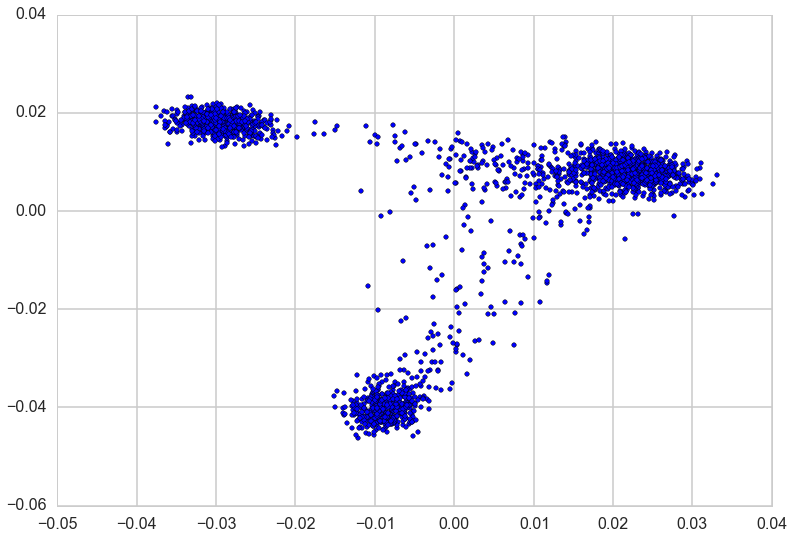

In [42]:
plt.scatter(y=eigenvec[:,0], x=eigenvec[:,1])

In [9]:
topPCs = eigenvec[:,0:2]

In [10]:
%%time
K = 3
KM = KMeans(n_clusters=K, init='k-means++')
KM.fit(topPCs)

CPU times: user 15.5 ms, sys: 1.35 ms, total: 16.9 ms
Wall time: 17.3 ms


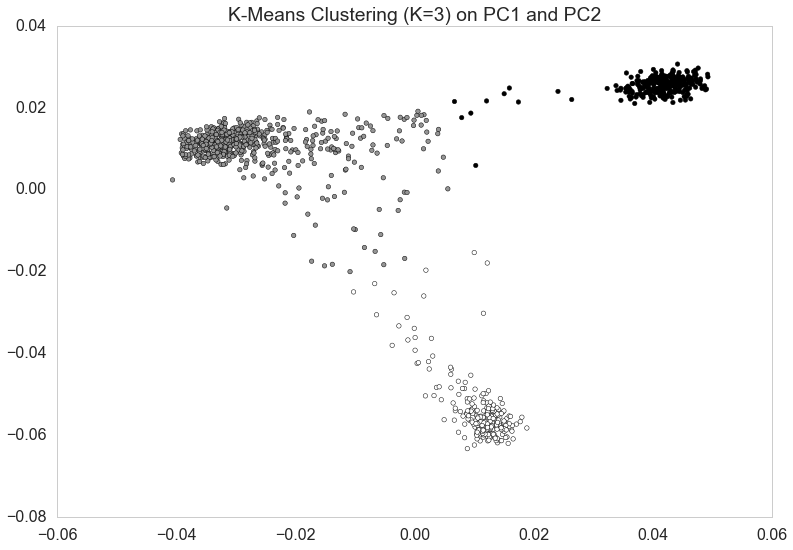

In [47]:
plt.scatter(y=eigenvec[:,0], x=eigenvec[:,1], c=KM.labels_)
plt.grid()
plt.title("K-Means Clustering (K=3) on PC1 and PC2")
plt.show()

In [12]:
KM.cluster_centers_

array([[-0.05407962,  0.01087353],
       [ 0.01039487, -0.0268491 ],
       [ 0.0253417 ,  0.0411606 ]])

In [13]:
KM.labels_.shape

(1094,)

In [14]:
sample = np.genfromtxt("ALL_1000G_phase1interim_jun2011.sample", skip_header=1, dtype='str')

In [15]:
sample_labels = zip(sample[:,1], KM.labels_)

In [16]:
label0 = set()
label1 = set()
label2 = set()
for subject in sample_labels:
    if subject[1] == 0:
        label0.add(subject[0])
    if subject[1] == 1:
        label1.add(subject[0])
    if subject[1] == 2:
        label2.add(subject[0])

In [17]:
label0

{'ASW', 'CLM', 'LWK', 'PUR', 'YRI'}

In [18]:
label1

{'ASW', 'CEU', 'CLM', 'FIN', 'GBR', 'IBS', 'MXL', 'PUR', 'TSI'}

In [19]:
label2

{'ASW', 'CHB', 'CHS', 'CLM', 'JPT', 'MXL'}

# DBSCAN clustering

### Load data

In [20]:
data.shape

(824876, 1094)

### Get column indices of different labels

In [21]:
cluster0_indices = np.where(KM.labels_ == 0)[0]
cluster1_indices = np.where(KM.labels_ == 1)[0]
cluster2_indices = np.where(KM.labels_ == 2)[0]

### Partition the dataset by cluster labels

In [22]:
data0 = np.take(data, cluster0_indices, axis=1)

In [23]:
data0.shape

(824876, 245)

In [24]:
data1 = np.take(data, cluster1_indices, axis=1)
data2 = np.take(data, cluster2_indices, axis=1)

### Convert to csr format

In [25]:
data0 = csr_matrix(data0)
data1 = csr_matrix(data1)
data2 = csr_matrix(data2)

In [89]:
#from sklearn.cluster import DBSCAN

In [ ]:
#%%time
#db = DBSCAN(eps=0.6, min_samples=1000).fit(data0)
#labels0 = db.labels_

In [26]:
from sklearn.neighbors import LSHForest

In [27]:
%%time
lshf = LSHForest()
lshf.fit(data0)

CPU times: user 10.9 s, sys: 2.83 s, total: 13.7 s
Wall time: 13.9 s


In [34]:
lshf.kneighbors(data0[1], n_neighbors=5)

(array([[ 0.        ,  0.64644661,  0.64644661,  0.64644661,  0.64644661]]),
 array([[     1,  42499, 238280, 600581, 269805]]))